<a href="https://colab.research.google.com/github/guilhermelaviola/BrazilianPresidentialElections/blob/main/BrazilianPresidentialElections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'whitegrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-afcfcec3bb98>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters
filename = 'presidential-elections-br-totals.xlsx'
search_path = '/content/drive/My Drive/Datasets/Elections'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [6]:
# Importing the datasets:
df = pd.ExcelFile(file)
candidates = pd.read_excel(df, 'Total votes')
voters = pd.read_excel(df, 'Total voters by year')

In [7]:
# Displaying the last 10 candidates:
candidates.tail(10)

,Year,Candidate,Running mate,Candidate party,Running mate party,First round votes,First round %,Second round votes,Second round %
164,2022,Luiz Felipe d'Avila,Tiago Mitraud,NOVO,NOVO,559708,0.47,NaN,NaN
165,2022,Sofia Manzano,Antonio Alves da Silva,PCB,PCB,45620,0.04,NaN,NaN
166,2022,Kelmon Souza,Luiz Cláudio Gamonal,PCO,PCO,81129,0.07,NaN,NaN
167,2022,Ciro Gomes,Ana Paula Matos,PDT,PDT,3599287,3.04,NaN,NaN
168,2022,Jair Bolsonaro,Walter Braga Netto,PL,PL,51072345,43.20,58206354.0,49.1
169,2022,Simone Tebet,Mara Gabrilli,PMDB,PSDB,4915423,4.16,NaN,NaN
170,2022,Vera Lúcia Salgado,Kunã Yporã Tremembé,PSTU,PSTU,25625,0.02,NaN,NaN
171,2022,Luiz Inácio Lula da Silva,Geraldo Alckmin,PT,PSB,57259504,48.43,60345999.0,50.9
172,2022,Soraya Thronicke,Marcos Cintra,UB,UB,600955,0.51,NaN,NaN
173,2022,Leonardo Péricles,Samara Martins,UP,UP,53519,0.05,NaN,NaN


In [8]:
# Displaying the last 10 voter data:
voters.tail(10)

,Year,Valid votes first round,Valid votes second round,Invalid/blank votes first round,Invalid/blank votes second round,Registered voters/turnout,Population
16,1960,11679157,0,907197.0,0,12586354.0,NaN
17,1989,67625886,66166009,4649897.0,4094339,82074718.0,NaN
18,1994,63312331,0,14636133.0,0,94782803.0,NaN
19,1998,67722565,0,15575298.0,0,106101067.0,NaN
20,2002,84952512,86164103,9850438.0,5499898,115253816.0,NaN
21,2006,95996733,95838220,8823726.0,6160001,125913134.0,NaN
22,2010,101590153,99463917,9603594.0,7142025,135804433.0,NaN
23,2014,104023802,105542273,11099081.0,7141606,142822046.0,NaN
24,2018,107050749,11094698,10313159.0,11094698,147306295.0,NaN
25,2022,118229719,118552353,5452653.0,5700443,156453354.0,NaN


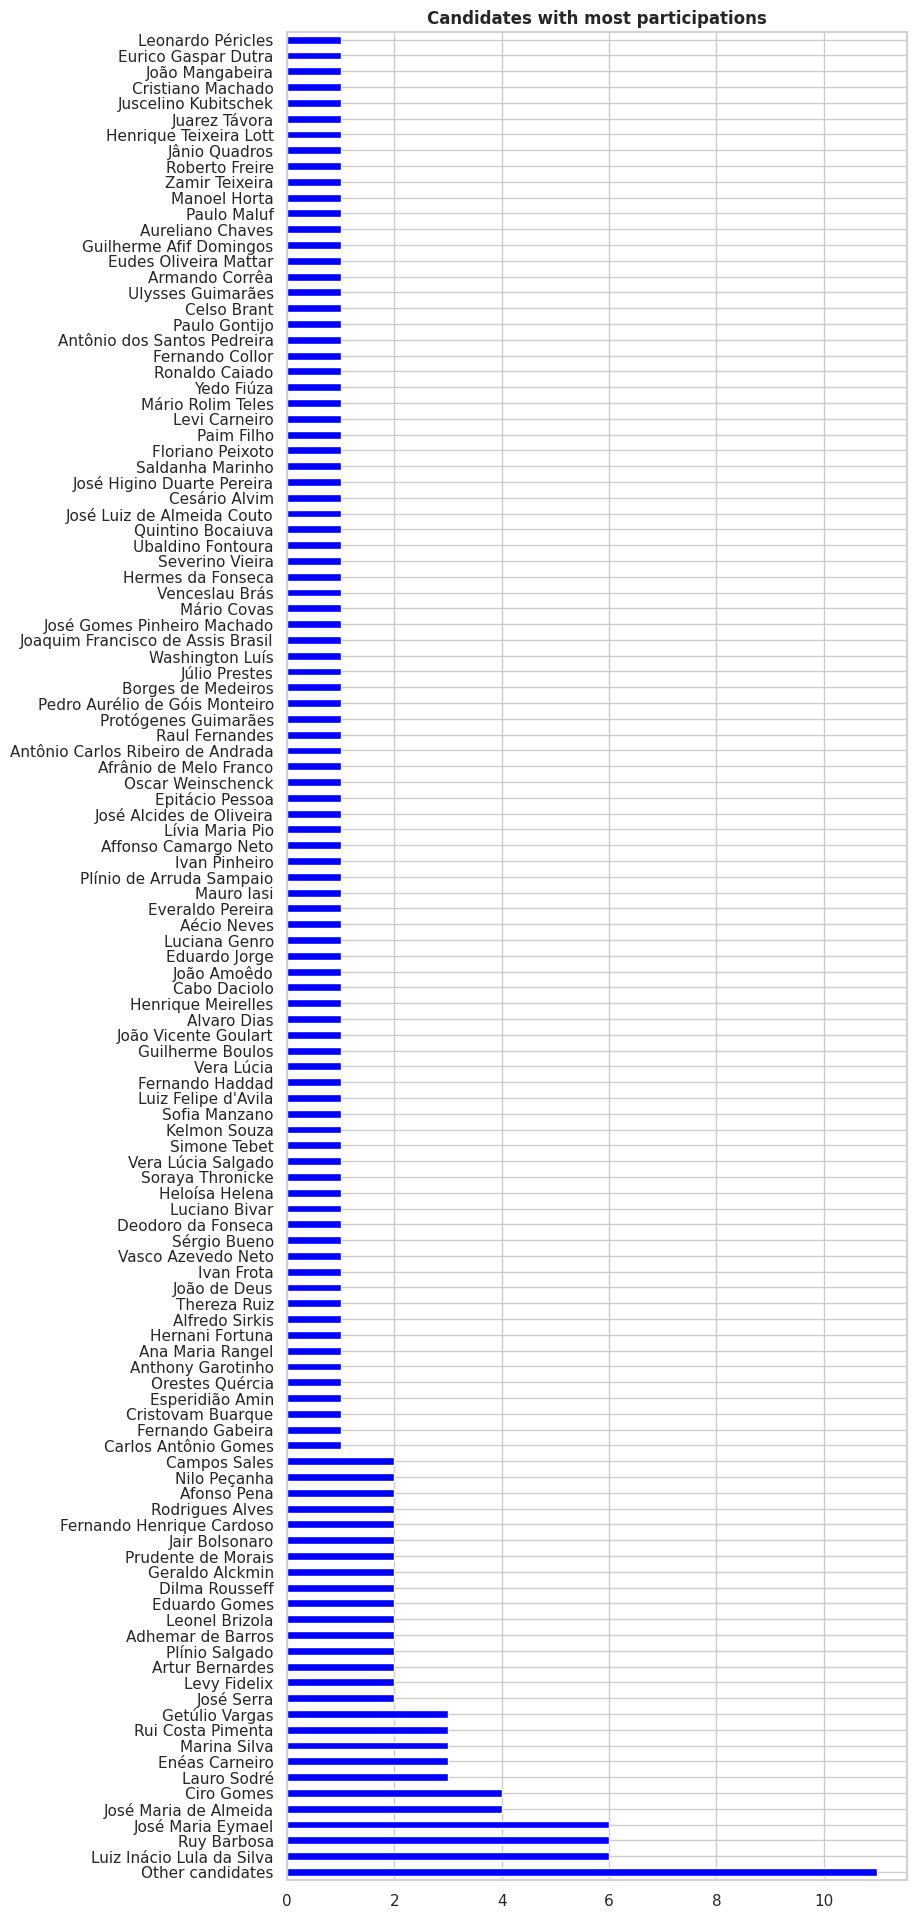

In [10]:
# Displaying the candidates with most participations in the elections:
candidates['Candidate'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 24))
plt.ylabel(None)
plt.title('Candidates with most participations', fontweight = 'bold')
plt.show()

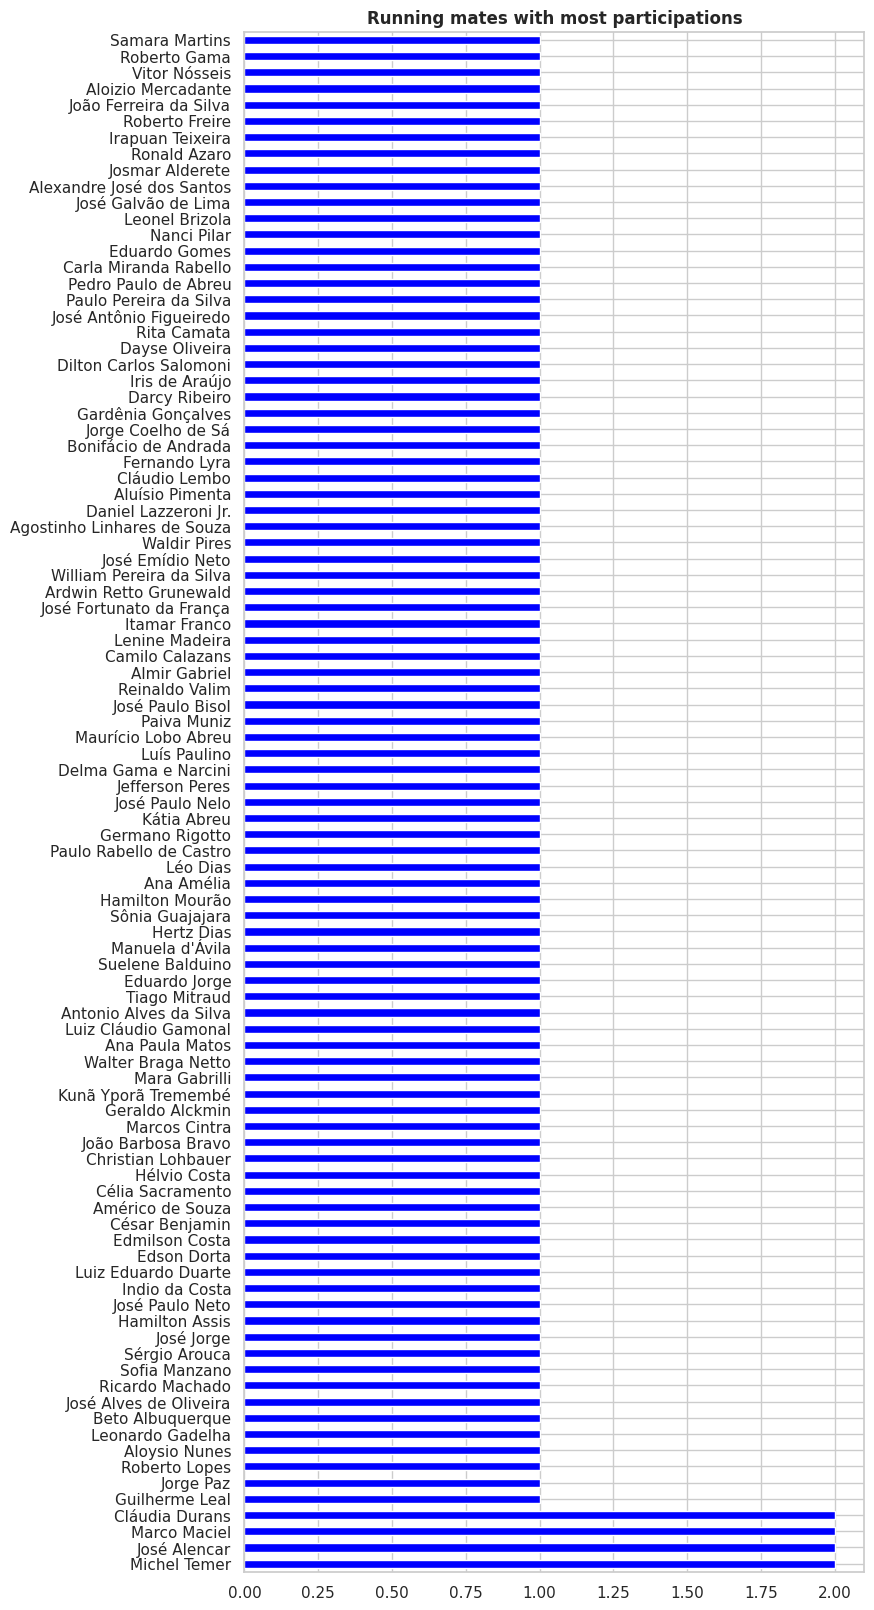

In [11]:
# Displaying the running mates with most participations in the elections:
candidates['Running mate'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Running mates with most participations', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as some parties are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [15]:
# Splitting the parties by comma and removing leading spaces:
candidates['Candidate party'] = candidates['Candidate party'].astype(str).str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
#candidates = candidates.explode('Genres') # 'Genres' does not exist, should be 'Candidate party'
candidates = candidates.explode('Candidate party')

# Counting Matrix using crosstab method:
party_counts = pd.crosstab(index = candidates.index, columns = candidates['Candidate party'], margins = False).to_dict('index')
party_counts = pd.DataFrame(party_counts)

# Counting the number of 0s and 1s in each row:
counts = (party_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [16]:

# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
AL             173     1
DC             172     2
Independent    172     2
NOVO           172     2
PAN            173     1
PATRI          173     1
PCB            169     5
PCN            173     1
PCO            170     4
PDC            172     2
PDCdoB         173     1
PDS            173     1
PDT            169     5
PFL            173     1
PL             172     2
PLP            173     1
PMB            173     1
PMDB           170     4
PMN            172     2
PN             173     1
PODE           173     1
PP             173     1
PPB            173     1
PPL            173     1
PPS            172     2
PRB            173     1
PRC            173     1
PRD            173     1
PRF            171     3
PRL            173     1
PRM            168     6
PRN            172     2
PRONA          171     3
PRP            172     2
PRP[1]         164    10
PRTB           172     2
PSB            172     2
PSB[1]         173     1
PSC            171     3


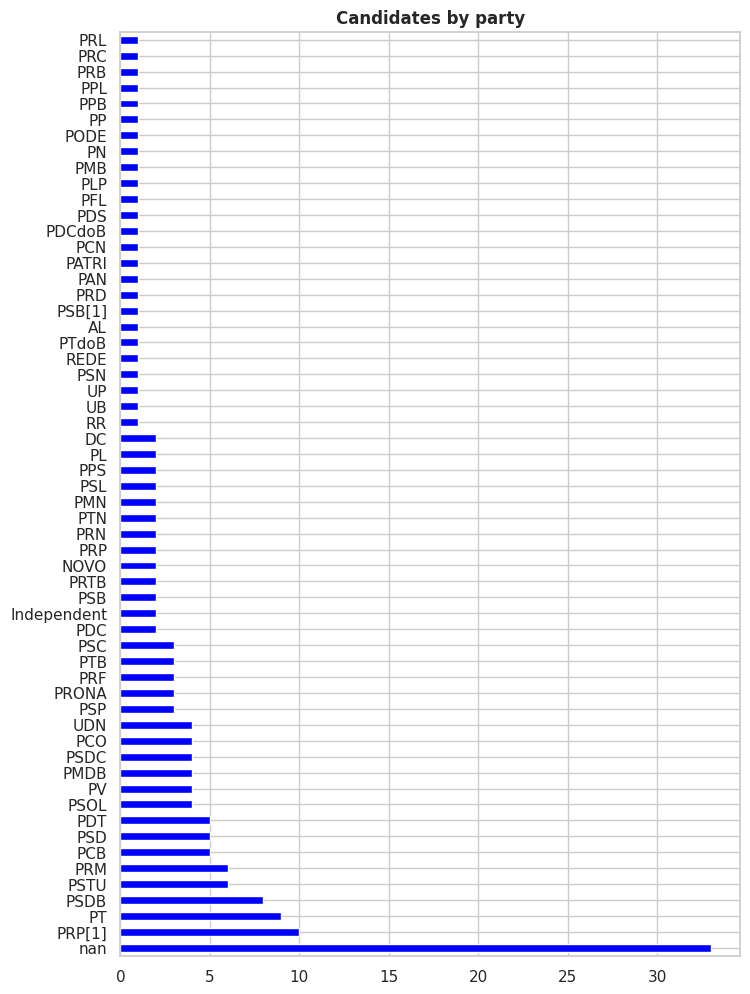

In [19]:
# Displaying the proportions of the parties present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Candidates by party', fontweight = 'bold')
plt.show()

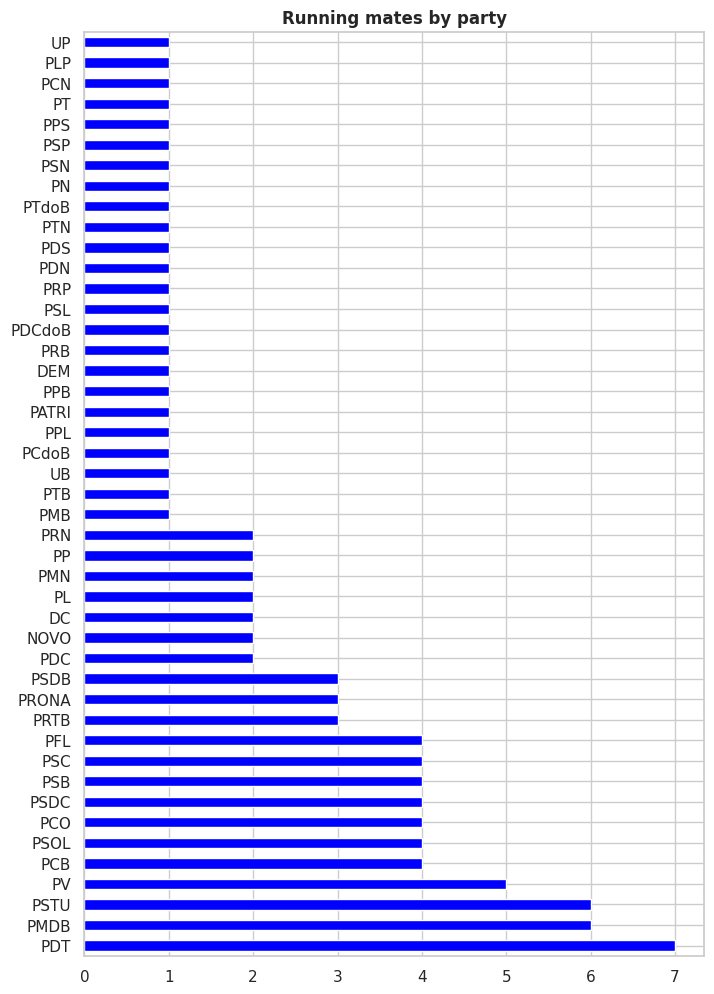

In [20]:
# Displaying the parties with most and less running mates:
candidates['Running mate party'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Running mates by party', fontweight = 'bold')
plt.show()

In [21]:
greatest_results = candidates['First round %'] > 30
print(greatest_results)

0       True
1       True
2      False
3      False
4      False
       ...  
169    False
170    False
171     True
172    False
173    False
Name: First round %, Length: 177, dtype: bool


In [22]:
# Analysing valid/invalid votes (first round):
def valid_votes_1st_percentage(row):
  valid_votes_1st = row['Valid votes first round']
  invalid_votes_1st = row['Invalid/blank votes first round']
  registered_voters = row['Registered voters/turnout']

  result = (valid_votes_1st / registered_voters) * 100

  return result

# Applying the function above on a column of the dataset and generating a new column as result:
voters['Valid votes first round %'] = voters.apply(valid_votes_1st_percentage, axis=1)
voters.tail()


,Year,Valid votes first round,Valid votes second round,Invalid/blank votes first round,Invalid/blank votes second round,Registered voters/turnout,Population,Valid votes first round %
21,2006,95996733,95838220,8823726.0,6160001,125913134.0,NaN,76.240444
22,2010,101590153,99463917,9603594.0,7142025,135804433.0,NaN,74.806213
23,2014,104023802,105542273,11099081.0,7141606,142822046.0,NaN,72.834555
24,2018,107050749,11094698,10313159.0,11094698,147306295.0,NaN,72.672216
25,2022,118229719,118552353,5452653.0,5700443,156453354.0,NaN,75.568670


In [23]:
def valid_votes_2nd_percentage(row):
  valid_votes_2nd = row['Valid votes second round']
  invalid_votes_2nd = row['Invalid/blank votes second round']
  registered_voters = voters['Registered voters/turnout']

  result = (valid_votes_2nd / registered_voters) * 100

  return result

# Applying the function above on a column of the dataset and generating a new column as result:
voters['Valid votes second round %'] = voters.apply(valid_votes_2nd_percentage, axis=1)
voters.tail()

ValueError: Cannot set a DataFrame with multiple columns to the single column Valid votes second round %